Analyze state factors

In [1]:
import json
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def scale_length(arr):
    timestep = len(arr)
    
    if timestep == 100:
        return arr
    elif timestep < 100:
        factor = 100 // timestep
        remainder = 100 % timestep
        scaled_arr = []
        for i in range(timestep):
            scaled_arr.extend([arr[i]] * factor)
            if i < remainder:
                scaled_arr.append(arr[i])
        return scaled_arr
    else:
        scaling_factor = timestep / 100
        scaled_arr = [arr[int(i * scaling_factor)] for i in range(100)]
        return scaled_arr

In [4]:
ids = os.listdir("/data/flybyml_dataset_v1/data")

all_act = []

for id in ids:
    act = []
    with open(f"/data/flybyml_dataset_v1/data/{id}", "r") as f:
        data = json.load(f)
    
    data = scale_length(data)
    
    for datum in data:
        # construct actions
        # normalize all values ranging from 0 to 1
        act.append(np.array([
            datum['control']['elevator'],
            datum['control']['aileron'],
            datum['control']['thrust'],
            datum['control']['rudder'],
            datum['control']['gear'],
            datum['control']['flaps'],
            datum['control']['trim'],
            datum['control']['brake'],
            datum['control']['speed_brake'],
            datum['control']['reverse_thrust']
            
        ]))
    all_act.append(np.stack(act, axis=0)) 
    
all_act = np.array(all_act)

print(all_act.shape)

(49, 100, 10)


In [7]:
all_act = np.transpose(all_act, (2, 1, 0)) # (10, 100, 49)
all_act.shape

(10, 100, 49)

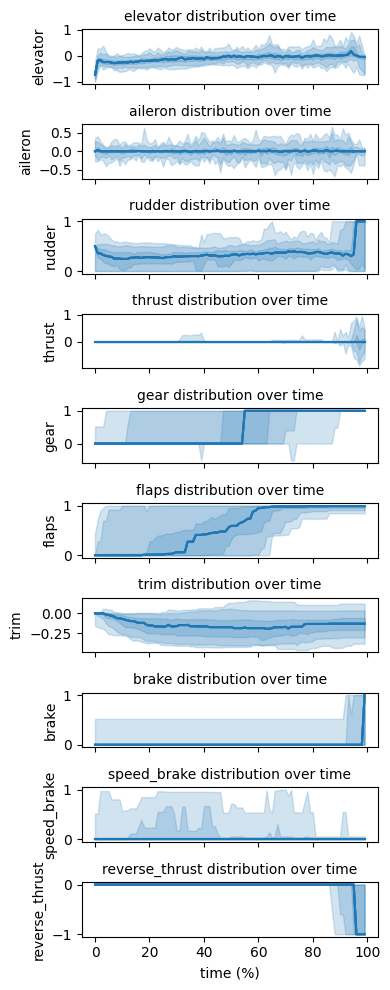

In [16]:
keys = ['elevator', 'aileron', 'rudder', 'thrust', 'gear', 'flaps', 'trim', 'brake', 'speed_brake', 'reverse_thrust']
fig, axs = plt.subplots(10, sharex=True, figsize=(4, 10))

for i, control_factor in enumerate(keys):
    df = pd.DataFrame({
        'timestep': [num for num in range(100) for _ in range(49)],
        'action': all_act[i].flatten().tolist()
    })

    for interval in [50, 90, 98]:
        plot = sns.lineplot(df, x='timestep', y='action', estimator="median", errorbar=("pi", interval), color="C0", ax=axs[i])
        
    axs[i].set_xlabel('time (%)', fontsize=10)
    axs[i].set_ylabel(f'{control_factor}', fontsize=10)
    axs[i].set_title(f'{control_factor} distribution over time', fontsize=10)
    
fig.tight_layout()
plt.show()

Text(0.5, 0, 'time (%)')

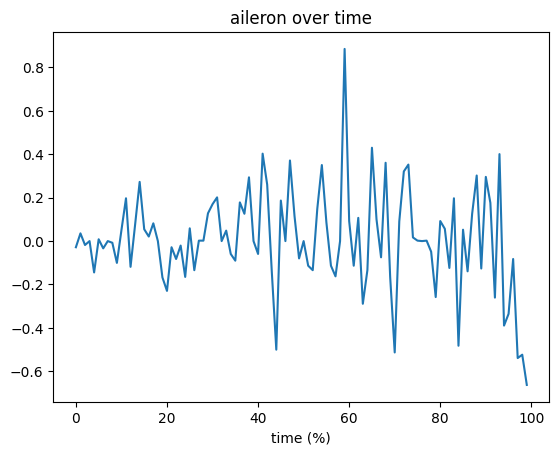

In [26]:
temp = np.transpose(all_act, (0, 2, 1)) # (10, 49, 100)

plt.title('aileron over time')
plt.plot(temp[1][0])
plt.xlabel('time (%)')